In [1]:
%matplotlib inline
import obspy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates


from hydrophone_data_processing import load, preprocessing, tempmatch
# from multitaper.multitaper import Multitaper
# from spectrum import *
import spectrum

In [6]:
detectfiles = '/media/sda/data/borehole/detections/*.csv'
bubbles = load.import_detections(detectfiles)
bubbles = bubbles[bubbles.time.between('2019-05-18', '2019-05-19')]
bubbles

,time,similarity,template_id
0,2019-05-18 11:45:45.948000+00:00,0.946315,0
1,2019-05-18 11:47:16.325000+00:00,0.967347,0
2,2019-05-18 11:47:54.450000+00:00,0.961553,0
3,2019-05-18 11:49:19.032000+00:00,0.979752,0
4,2019-05-18 11:49:27.501000+00:00,0.968194,0
...,...,...,...
397,2019-05-18 16:04:19.449000+00:00,0.983049,0
398,2019-05-18 17:46:28.279000+00:00,0.991158,0
399,2019-05-18 18:41:01.542000+00:00,0.987279,0
400,2019-05-18 18:57:46.188000+00:00,0.950609,0


In [8]:
paths = ['/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.138']

day138 = load.import_corrected_data_for_single_day(paths=paths)

In [10]:
bubbles.time[0]

Timestamp('2019-05-18 11:45:45.948000+0000', tz='UTC')

In [112]:
# def get_bubble_waveform_h1(starttime):
def get_bubble_waveform(starttime):
    starttime = obspy.UTCDateTime(starttime)
    return day138.slice(starttime=starttime-0.05, endtime=starttime+0.1).copy()

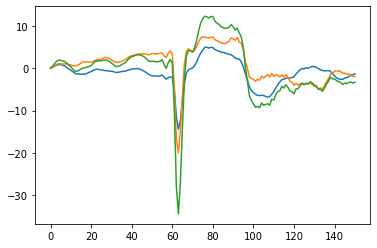

In [113]:
# starttime = obspy.UTCDateTime(bubbles.time[0])
# sample1 = day138.slice(starttime=starttime-0.05, endtime=starttime+0.2)[0].plot()

b1 = get_bubble_waveform(starttime=bubbles.time[0])[0]
b2 = get_bubble_waveform(starttime=bubbles.time[1])[0]

fig, ax = plt.subplots()

ax.plot(b1)
ax.plot(b2)
ax.plot(b1.data+b2.data)

In [114]:
get_bubble_waveform(bubbles.time[0])

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-05-18T11:45:45.898000Z - 2019-05-18T11:45:46.048000Z | 1000.0 Hz, 151 samples
7F.B00.02.GDH | 2019-05-18T11:45:45.898000Z - 2019-05-18T11:45:46.048000Z | 1000.0 Hz, 151 samples
7F.B00.03.GDH | 2019-05-18T11:45:45.898000Z - 2019-05-18T11:45:46.048000Z | 1000.0 Hz, 151 samples
7F.B00.04.GDH | 2019-05-18T11:45:45.898000Z - 2019-05-18T11:45:46.048000Z | 1000.0 Hz, 151 samples
7F.B00.05.GDH | 2019-05-18T11:45:45.898000Z - 2019-05-18T11:45:46.048000Z | 1000.0 Hz, 151 samples
7F.B00.06.GDH | 2019-05-18T11:45:45.898000Z - 2019-05-18T11:45:46.048000Z | 1000.0 Hz, 151 samples

In [115]:
obspy.UTCDateTime(bubbles.time[0])+0.05

2019-05-18T11:45:45.998000Z

In [116]:
times = bubbles.time

bwave1 = get_bubble_waveform(starttime=obspy.UTCDateTime(times[0]))[0].data
bwave2 = get_bubble_waveform(starttime=obspy.UTCDateTime(times[0])+0.05)[1].data
bwave3 = get_bubble_waveform(starttime=obspy.UTCDateTime(times[0])+0.05*2)[2].data
bwave4 = get_bubble_waveform(starttime=obspy.UTCDateTime(times[0])+0.05*3)[3].data
bwave5 = get_bubble_waveform(starttime=obspy.UTCDateTime(times[0])+0.05*4)[4].data
bwave6 = get_bubble_waveform(starttime=obspy.UTCDateTime(times[0])+0.05*5)[5].data
for t in bubbles.time[1:]:
    bwave1 += get_bubble_waveform(starttime=obspy.UTCDateTime(t))[0].data
    bwave2 += get_bubble_waveform(starttime=obspy.UTCDateTime(t)+0.05)[1].data
    bwave3 += get_bubble_waveform(starttime=obspy.UTCDateTime(t)+0.05*2)[2].data
    bwave4 += get_bubble_waveform(starttime=obspy.UTCDateTime(t)+0.05*3)[3].data
    bwave5 += get_bubble_waveform(starttime=obspy.UTCDateTime(t)+0.05*4)[4].data
    bwave6 += get_bubble_waveform(starttime=obspy.UTCDateTime(t)+0.05*5)[5].data

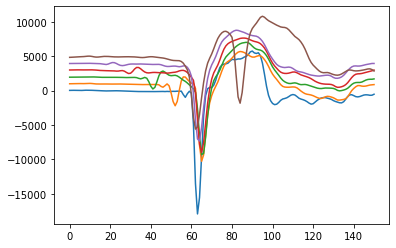

In [117]:
plt.plot(bwave1)
plt.plot(bwave2+1000)
plt.plot(bwave3+2000)
plt.plot(bwave4+3000)
plt.plot(bwave5+4000)
plt.plot(bwave6+5000)

In [118]:
def zero_pad(data, N, k):
    data_length = N*k
    extra_zeros = np.zeros(int(data_length - data.shape[0]))
    data = np.append(data, extra_zeros)
    return data

def get_power_freq(N, NW, k, data):
    data = zero_pad(data, N, k)
    data = np.reshape(data, (k, N))
    w, eigens = spectrum.dpss(N, NW, k)
    sk, weights, eigenvalues = spectrum.pmtm(data, e=eigens, v=w, method='eigen')
    power = 10*np.log10(np.abs(np.mean(sk * sk.conj(), axis=0)))
    Tlength = 1000/(data.shape[0] * data.shape[1])
    freq = np.ones(power.shape) * Tlength
    freq = freq.cumsum()
    return freq, power

In [119]:
freq1, power1 = get_power_freq(N=64, NW=3/2, k=4, data=bwave1)
freq2, power2 = get_power_freq(N=64, NW=3/2, k=4, data=bwave2)
freq3, power3 = get_power_freq(N=64, NW=3/2, k=4, data=bwave3)
freq4, power4 = get_power_freq(N=64, NW=3/2, k=4, data=bwave4)
freq5, power5 = get_power_freq(N=64, NW=3/2, k=4, data=bwave5)
freq6, power6 = get_power_freq(N=64, NW=3/2, k=4, data=bwave6)

In [ ]:
fig, (ax0, ax) = plt.subplots(1, 2, figsize=(15,7))

ax0.plot(bwave1, label='h1')
ax0.plot(bwave2+1000, label='h2')
ax0.plot(bwave3+2000, label='h3')
ax0.plot(bwave4+3000, label='h4')
ax0.plot(bwave5+4000, label='h5')
# ax0.plot(bwave6+5000, label='h6')
ax0.legend(fontsize=15)

ax0.set_xlabel('Time $(ms^{-1})$', fontsize=15)
ax0.set_ylabel('Stacked Amplitudes $(Pa)$', fontsize=15)

ax.plot(freq1, power1, label='h1')
ax.plot(freq2, power2, label='h2')
ax.plot(freq3, power3, label='h3')
ax.plot(freq4, power4, label='h4')
ax.plot(freq5, power5, label='h5')
# ax.plot(freq6, power6, label='h6')
ax.set_xlim(0, 500)
ax.legend(fontsize=15)
ax.set_ylabel('Power, dB $(Pa^2 Hz^{-1})$', fontsize=15)
ax.set_xlabel('Frequency, Hz', fontsize=15)

Text(0.5, 0, 'Frequency, Hz')

Text(0, 0.5, 'Stacked Amplitudes $(Pa)$')

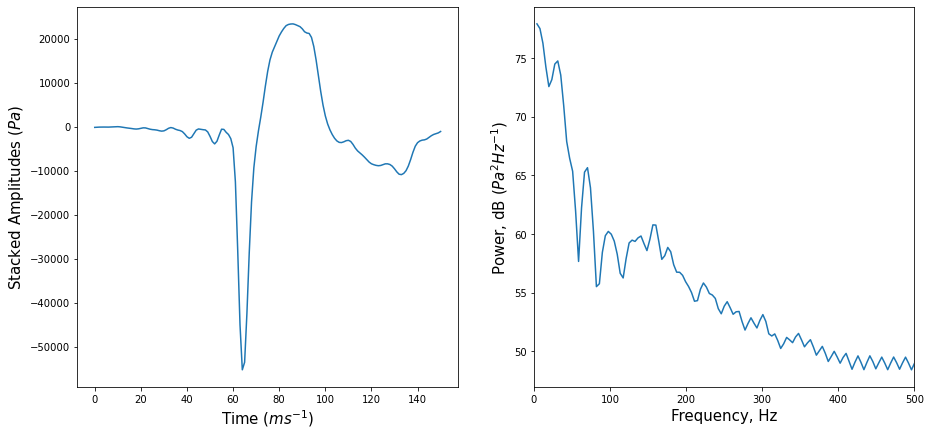

In [132]:
bw = bwave1+bwave2+bwave3+bwave4+bwave5

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax.plot(bw)
freq, power = get_power_freq(N=64, NW=3/2, k=4, data=bwave1)
ax2.plot(freq, power)

ax2.set_xlim(0, 500)
ax2.set_ylabel('Power, dB $(Pa^2 Hz^{-1})$', fontsize=15)
ax2.set_xlabel('Frequency, Hz', fontsize=15)

ax.set_xlabel('Time $(ms^{-1})$', fontsize=15)
ax.set_ylabel('Stacked Amplitudes $(Pa)$', fontsize=15)

In [133]:
def minnaert_radius(freq):
    # https://www.engineeringtoolbox.com/specific-heat-capacity-gases-d_159.html
    gamma = 1.405 # taken from website above for 300K
    PA = 2.5 * 100000 # kg/(m*s^2)
    rho = 997 # kg/m^3
    # PA/rho => PA(kg*m^-1*s^-2) / rho(kg * m^-3) =? PA(...) * rho(kg^-1 * m^3) => m^2 * s^-2
    return (2 * np.pi * freq)**(-1) * ((3 * gamma * PA)/(rho))**(1/2)

In [137]:
minnaert_radius(freq=125)

0.04139342221195375

In [136]:
minnaert_radius(freq=150)

0.034494518509961464